## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# find the total number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# find the number of unique users in the dataset
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
# find the mean of converted users
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# find the number of times the new_page and treatment don't match
df.query('group == "control" and landing_page == "new_page"').shape[0] + df.query('group == "treatment" and landing_page == "old_page"').shape[0]

3893

**Answer:**
There are 3893 instances that treatment group users have landed on the old page and control group users have landed on the new page.

f. Do any of the rows have missing values?

In [7]:
# finding the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**Answer:** <br>
This data set has 294478 rows. The above result shows that all five columns also have 294478 values. Thus, we can conclude that there are no missing values in this dataset.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.    

a. Now we create a new dataset that meets the specifications and store the new dataframe in **df2**.

In [8]:
df_old = df.query('group == "control" and landing_page == "old_page"') #select all rows with control group landed on old page
df_new = df.query('group == "treatment" and landing_page == "new_page"') #select all rows with treatment group landed on new page
df2 = pd.concat([df_old, df_new]) #join the above two dataframes
df2.shape #find the size of the dataframe

(290585, 5)

**Answer:** <br>
The new dataframe(df2) has 290585 rows and 5 columns. 

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions.

a. How many unique **user_id**s are in **df2**?

In [10]:
# find the number of unique user ids in the df2
df2['user_id'].nunique()

290584

**Answer:** <br>
There are 290585 rows in the df2. But there are only 290584 unique user ids. That means one user id is repeated in the df2.

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# finding the repeated user id
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**Answer:** <br>
The user id 773192 is duplicated in the dataframe(df2).

c. What is the row information for the repeat **user_id**? 

In [12]:
# finding the row information for the duplicated user id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**Answer:** <br>
The two rows 1899 and 2893 have same user id.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# remove a one row with a duplicate user_id (773192)
df2.drop_duplicates(subset="user_id", inplace=True)

In [14]:
# make sure that the user id 773192 has only one row now.
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [15]:
# make sure that there are no more duplicated user ids
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
# finding the probability of converting regardless of the page they receive
df2.query('converted == 1').shape[0]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
# finding the probability of converting a user in the control group
control_converted = df2.query('converted == 1 and group == "control"').shape[0]/df2.query('group == "control"').shape[0]
control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# finding the probability of converting a user in the treatment group
treatment_converted = df2.query('converted == 1 and group == "treatment"').shape[0]/df2.query('group == "treatment"').shape[0]
treatment_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
# finding the probability of a user received the new page
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:** <br>
According to the above findings there is no enough evidence to conclude that the new treatment page leads to more conversions. 
In the above experiment, 290584 users have been tested. half of these users have landed to the new_page(treatment group) and half of users have landed old_page(control group). So we can decide that this experiment is well structured. <br>
According to the results, the probability of conversion from an individual in control group is 12.0% and the probability of conversion from an individual in treatment group is 11.9%.
both percentages are almost similar, so we can't conclude that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:** <br>
Null hypothesis (H0): <br> 
$\;\;\;\;\;\;$        p_new <= p_old <br>
Alternative hypothesis(H1): <br> 
$\;\;\;\;\;\;$         p_new > p_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
# finding the p_new under the null
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
# finding the p_new under the null
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
# finding n_new (no of users in the treatment group)
n_new = df2.query("group == 'treatment'").shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
# finding n_old (no of users in the control group)
n_old = df2.query("group == 'control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
# Simulate n_new transactions with a conversion rate of p_new under the null.
new_page_converted = np.random.choice([1,0], n_new, p=[p_new, 1-p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
# Simulate n_old transactions with a conversion rate of 𝑝_old under the null.
old_page_converted = np.random.choice([1,0], n_old, p=[p_old, 1-p_old])
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# Find p_new - p_old for simulated values from part (e) and (f), we need to get the mean value of new_page_converted and old_page_converted as they have different sizes.
new_page_converted.mean() - old_page_converted.mean()

-0.00083498333828438409

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1,0], n_new, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice([1,0], n_old, p=[p_old, 1-p_old])
    p_diffs.append(new_page_converted.mean() -  old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

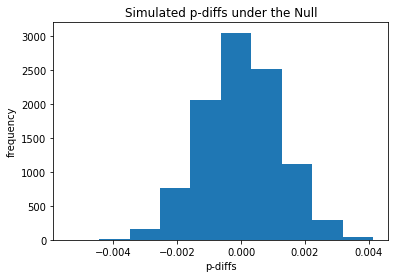

In [28]:
# convert to numpy array
p_diffs = np.array(p_diffs)

# plot the graph
plt.hist(p_diffs);
plt.title('Simulated p-diffs under the Null');
plt.xlabel('p-diffs');
plt.ylabel('frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# calculating actual difference observed in ab_data set
obs_diff = treatment_converted - control_converted
obs_diff

-0.0015782389853555567

In [30]:
# calculate the proportion of p_diffs greater than the obs_diff
(p_diffs > obs_diff).mean()

0.90329999999999999

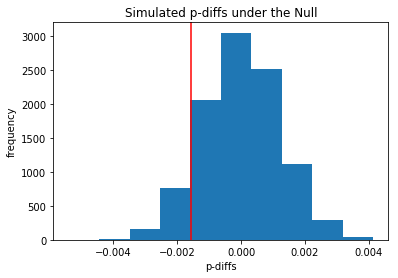

In [31]:
# plotting the observed difference line in the above graph
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');
plt.title('Simulated p-diffs under the Null');
plt.xlabel('p-diffs');
plt.ylabel('frequency');

**Answer:**
90.32% proportion of p-diffs are greater than the actual difference observed in ab_data.csv

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** <br>
p_diffs are greater than the actual difference observed in ab_data.csv by proposition of 90.32%. In scientific terms this value is called as p-value. large p-value(p_value > 0.05) suggests that we can't reject the null hypothesis. This implies, old page is same or better than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and group == "control"').shape[0]
convert_new = df2.query('converted == 1 and group == "treatment"').shape[0]
n_old = n_old
n_new = n_new
convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
zstat, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
zstat, pval

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** <br>
The value of z score is 1.31 and that value is greater than -1.645. That means, we'll fail to reject the null hypothesis and the test is not statisically significant. <br>
p-value is same as the value we obtained in the part **j.** The larger p-value also suggests that we fail to reject the null hypothesis.
These findings are agree with the findings in the part **j.** and **k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** <br>
Logistic regression. 
In this problem there is only two possible outcomes, conversion or no conversion. Thus, the best regression approach for such problems is logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# adding an intercept
df2['intercept'] = 1
# create dummy variables for ab_page
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

In [35]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-19 22:25 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:** <br>
p_value associate with ab_page is 0.1899. This value is greater than 0.05, which means this value is not statistically significant. This value is less than the previously founded p_value 0.905.
<br> Regression model hypotheses are, <br>$\;\;\;\;\;\;$ H0 = slope coefficient is zero (There is no impact from the landing page to the conversion rate) <br>$\;\;\;\;\;\;$ H1 = slope coefficient is not zero (There is a relationship (positive or negative) between the landing page and the conversion rate). <br> Since the calculated p_value is not statistically significant we can't reject the null hypothesis(H0). 
<br> According to these regression model hypotheses, this is a two tailed test.
According to hypotheses in the Part2(H1: P_new - P_old > 0), that test is one-tailed test. Because of this difference, the p_values in the hypothesis test and regression model test differs. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** <br>
Introducing other factors that can influence individual convertions is a good idea. This will lead to obtain a more accurate decision. <br>
Disadvantages: <br>
When introducing new terms we need to be more careful as this can lead to multicollinearity. if x variables are related to one another then it can make negative impacts on relationship with the response(y). Therefore, hypothesis testing results may not be reliable.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
# reading the countries data set
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
# join two data frames: df2 and df_countries
df3 = df2.set_index('user_id').join(df_countries.set_index('user_id'))

In [40]:
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US
936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US
719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US


In [41]:
df3.shape

(290584, 7)

In [42]:
df3['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [43]:
# creating dummy variables for country column
df3[['US', 'UK']] = pd.get_dummies(df3['country'])[['US', 'UK']]

In [44]:
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,1,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,1,0
936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,1,0
719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,1,0


In [47]:
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'UK']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [48]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-19 22:30 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

**Answer:** <br>
Both p_values for countries US(0.1295) and UK(0.0745) are greater than 0.05 value. That means countries are not statistically significant. So we can conclude that countries don't make any impact on conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [61]:
# creating two new columns to check the interaction between page and country
df3['UK_ab_page'] = df3['UK']*df3['ab_page']
df3['US_ab_page'] = df3['US']*df3['ab_page']

In [65]:
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,1,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,1,0,0,0
936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,1,0,0,0
719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,1,0,0,0


In [53]:
logit3 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US', 'UK_ab_page', 'US_ab_page']])
results = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [55]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-19 22:44 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

**Answer:** <br>
In the above summary results, all the obtained p_values are greater than 0.05 value. Specially, the two p-values obtained for page and country interactions(UK_ab_page - 0.1681, US_ab_page-0.3833) are greater than 0.05. This implies, that landing page and country interaction does not make any impact on the conversion rate. That means the influence of landing page in UK and US users do not differ from the influence of landing page in any other country user.

In [62]:
# finding the duration of experiment period
min(df3['timestamp']), max(df3['timestamp'])

('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

According to the above result, we can see that this experiment has executed for 22 days.

## Conclusion <br>
In this project, we have executed probability measures, A/B tests, and regression tests to check whether the new page leads to more conversions than the old page. According to all the results of the above tests, we can conclude that the new page does not increase the conversion rate when compared with the old page. Likewise, there is no evidence to prove that the user country makes any impact on the conversion rate. <br>
This experiment has executed with a large sample size(290584) for a considerable period (22 days). Both groups (control and treatment) have an almost similar number of users. So we can decide that this is a well-structured experiment. <br>
Therefore we don't need to run this experiment for any longer period. Finally, considering all the above factors we can conclude that the company should not implement the new page.

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0